In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import rainbow
import statsmodels.api as sm
%matplotlib inline

In [65]:
main_data = pd.read_csv('C:\\Users\\Muthu\\Downloads\\heart kaagle\\heart.csv')

In [66]:
#second_data = main_data

In [67]:
main_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* Age: displays the age of the individual.
* Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female
* Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
* Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
* Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
* If fasting blood sugar > 120mg/dl
    then : 1 (true)
    else : 0 (false)
* Resting ECG : displays resting electrocardiographic results
    0 = normal
    1 = having ST-T wave abnormality
    2 = left ventricular hyperthrophy
* Max heart rate achieved : displays the max heart rate achieved by an individual.
    Exercise induced angina :
    1 = yes
    0 = no
* ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
* Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
* Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
    0 = absence
    1, 2, 3, 4 = present.

In [68]:
main_data.shape

(303, 14)

In [69]:
main_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
#plt.figure(figsize=(20,9))
#c = main_data.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)

In [71]:
main_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


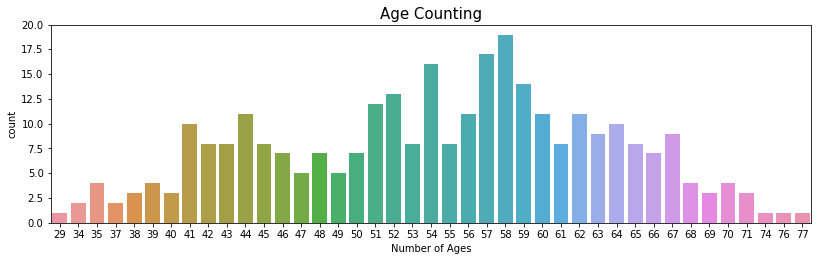

In [72]:
# Age counts
plt.figure(figsize = (30,8))
age = plt.subplot(221)
age = sns.countplot(x="age", data=main_data,ax=age)
age.set_title("Age Counting", fontsize=15)
age.set_xlabel("Number of Ages")
age.set_ylabel("count")
print(main_data['age'].value_counts())

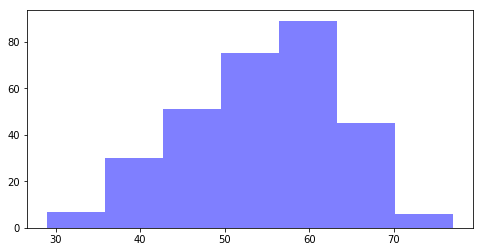

In [73]:
plt.figure(figsize = (8,4))
x = main_data['age']
num_bins = 7
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

1    207
0     96
Name: sex, dtype: int64


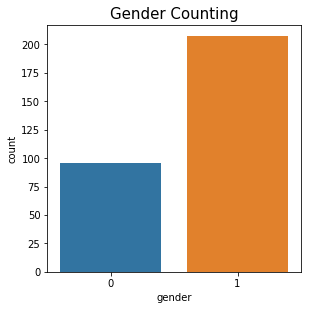

In [74]:
# gender
plt.figure(figsize = (10,10))
sex = plt.subplot(221)
sex = sns.countplot(x="sex", data=main_data,ax=sex)
sex.set_title("Gender Counting", fontsize=15)
sex.set_xlabel("gender")
sex.set_ylabel("count")
print(main_data['sex'].value_counts())
# 1 = male; 0 = female

In [75]:
print("The Percentage of Female: ",(main_data['sex'] == 0).mean()* 100)
print("The Percentage of Male: ",(main_data['sex'] == 1).mean()* 100)

The Percentage of Female:  31.683168316831683
The Percentage of Male:  68.31683168316832


0    143
2     87
1     50
3     23
Name: cp, dtype: int64


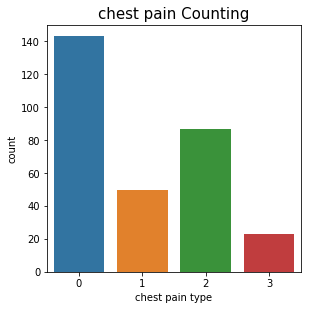

In [76]:
# chast pain
plt.figure(figsize = (10,10))
cp = plt.subplot(221)
cp = sns.countplot(x="cp", data=main_data,ax=cp)
cp.set_title("chest pain Counting", fontsize=15)
cp.set_xlabel("chest pain type")
cp.set_ylabel("count")
print(main_data['cp'].value_counts())

1    152
0    147
2      4
Name: restecg, dtype: int64


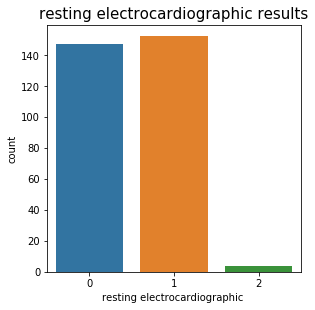

In [77]:
# resting electrocardiographic results
plt.figure(figsize = (10,10))
re = plt.subplot(221)
re = sns.countplot(x="restecg", data=main_data,ax=re)
re.set_title("resting electrocardiographic results", fontsize=15)
re.set_xlabel("resting electrocardiographic ")
re.set_ylabel("count")
print(main_data['restecg'].value_counts())

In [78]:
a = pd.get_dummies(main_data['restecg'], prefix = "restecg")

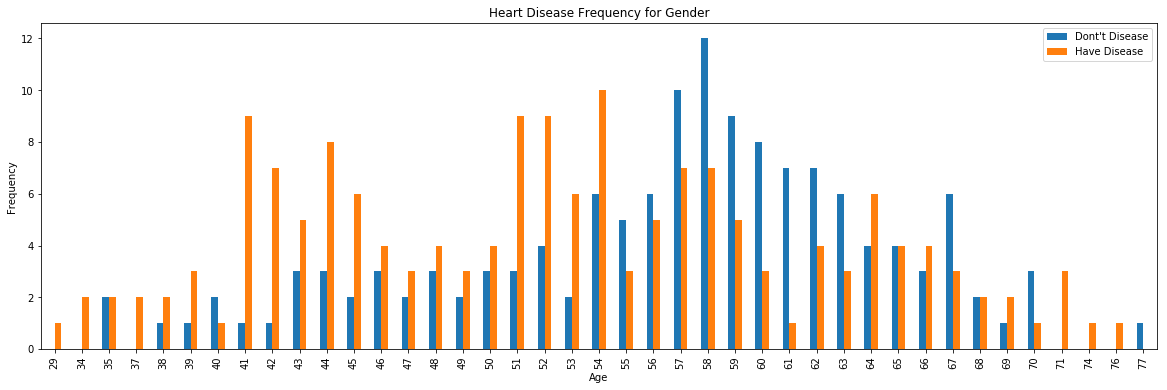

In [79]:
# Age vs Target
pd.crosstab(main_data.age,main_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Age')
plt.legend(["Dont't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

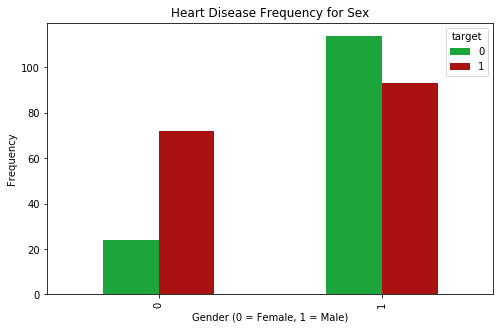

In [80]:
# Gender vs Target
pd.crosstab(main_data.sex,main_data.target).plot(kind="bar",figsize=(8,5),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

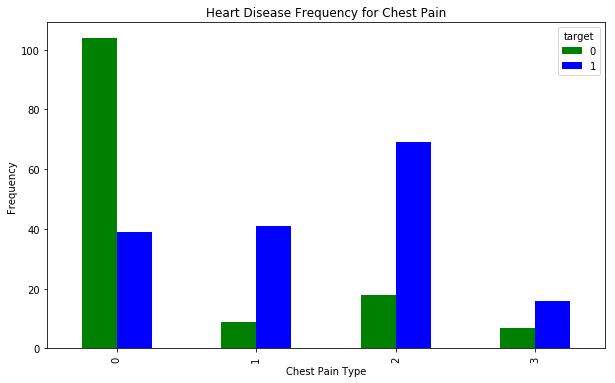

In [81]:
# chest pain vs target
pd.crosstab(main_data.cp,main_data.target).plot(kind="bar",figsize=(10,6),color=['green','blue' ])
plt.title('Heart Disease Frequency for Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

In [82]:
b = pd.get_dummies(main_data['cp'], prefix = "cp")

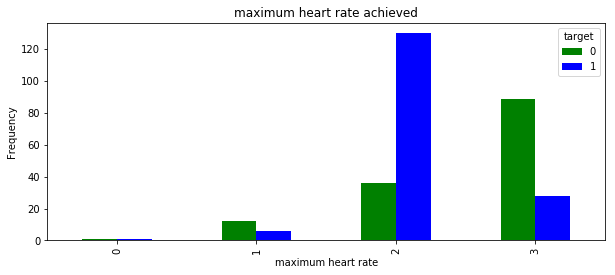

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [83]:
pd.crosstab(main_data.thal,main_data.target).plot(kind="bar",figsize=(10,4),color=['green','blue' ])
plt.title('maximum heart rate achieved')
plt.xlabel('maximum heart rate')
plt.ylabel('Frequency')
plt.show()
print(main_data['thal'].value_counts())

In [84]:
# number of major vessels (0-3) colored by flourosopy
print(main_data['ca'].value_counts())

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


In [85]:
e = pd.get_dummies(main_data['ca'], prefix = "ca")

In [86]:
c = pd.get_dummies(main_data['thal'], prefix = "thal")

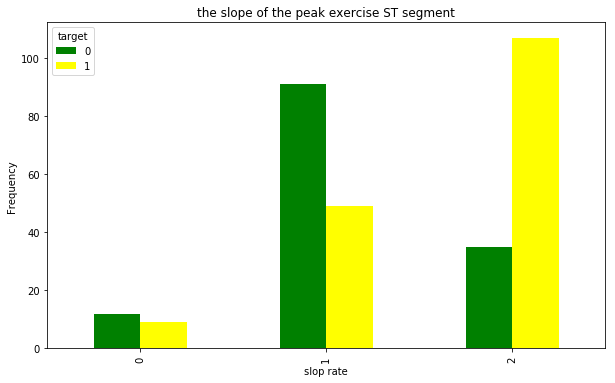

2    142
1    140
0     21
Name: slope, dtype: int64


In [87]:
pd.crosstab(main_data.slope,main_data.target).plot(kind="bar",figsize=(10,6),color=['green','yellow' ])
plt.title('the slope of the peak exercise ST segment')
plt.xlabel('slop rate')
plt.ylabel('Frequency')
plt.show()
print(main_data['slope'].value_counts())

In [88]:
d = pd.get_dummies(main_data['slope'], prefix = "thal")

In [89]:
frames = [main_data, a, b, c, d,e]
main_data2 = pd.concat(frames, axis = 1)
main_data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,thal_0,thal_1,thal_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,1,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,1,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,0,1,1,0,0,0,0


In [90]:
main_data2.drop(['slope','thal','cp', 'restecg','ca'], axis = 1).head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,restecg_0,...,thal_2,thal_3,thal_0,thal_1,thal_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,1,...,1,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,0,1,1,0,0,0,0


In [91]:
print(main_data2.shape)
print(main_data.shape)

(303, 33)
(303, 14)


In [92]:
X = main_data2.drop('target', axis=1)
y = main_data2['target']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Linear Regression**

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [96]:
results = model.fit(X_train,y_train)

In [97]:
print("Coefficient of the model(R2):",model.score(X_test,y_test))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Coefficient of the model(R2): 0.5455010779973029
intercept: 0.6496650268359389
slope: [ 3.22729460e-04 -1.48268286e-01  6.25657557e-02 -1.97029762e-03
 -5.32551974e-05  3.21689991e-02 -2.65246666e-02  7.33733905e-04
 -1.41012477e-01 -5.28660626e-02  2.29339780e-02  4.18884902e-03
  2.52128913e-02 -1.37875104e-02  5.40996874e-02 -4.03121770e-02
 -3.27160835e-02  1.51353081e-02  5.31187846e-03  1.22688969e-02
 -1.18212091e-01  9.63428135e-02  1.36737754e-01 -1.14868476e-01
  2.80041230e-02 -7.89422240e-02  5.09381010e-02  1.94397110e-01
 -1.12374628e-01 -1.49560743e-01 -1.45531917e-01  2.13070178e-01]


In [98]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-0.11803252  0.57951674  0.93530279  0.17967332  0.4565304   1.0238186
  0.14611386 -0.13434277  0.54235873  0.77439981  0.72036817  0.47347816
  1.03112592  1.02616039  0.76932634  0.94691358  0.26707293  0.40731957
  0.97373262  0.85261427  1.17484031 -0.07196004  0.47777633  0.59967912
  1.03874454  0.69121078  0.02590441  0.78656421  0.05456408  0.80924054
  0.9997465  -0.28073466  0.53538064  0.98701423  0.02985341  0.00768587
 -0.16329258  0.86172755  0.13205737  0.75866638  0.92429756  0.61603392
  0.58258291  0.99567195  1.01467625  0.1737686   0.94897117  0.87122665
  0.94668471  0.40312665  0.7068368   0.17823609  0.94960876 -0.07589528
  0.85077806  0.40600119  0.31380041  0.7338311  -0.00309809  0.76128807
  0.39995047]


In [99]:
#print(results.summary())

**KNeighborsClassifier**

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

C:\Users\Muthu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Muthu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [101]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4616435357484827
RMSE value for k=  2 is: 0.3621429841700741
RMSE value for k=  3 is: 0.35707779787332333
RMSE value for k=  4 is: 0.3607255893607662
RMSE value for k=  5 is: 0.3492380464879995
RMSE value for k=  6 is: 0.35064343665913833
RMSE value for k=  7 is: 0.35325755471970305
RMSE value for k=  8 is: 0.34770913037230167
RMSE value for k=  9 is: 0.33363677748659754
RMSE value for k=  10 is: 0.3279344196734423
RMSE value for k=  11 is: 0.3238268666867091
RMSE value for k=  12 is: 0.32257219860849506
RMSE value for k=  13 is: 0.32576197639282906
RMSE value for k=  14 is: 0.32360052032524217
RMSE value for k=  15 is: 0.3241353918918251
RMSE value for k=  16 is: 0.32208656305155087
RMSE value for k=  17 is: 0.320778167795705
RMSE value for k=  18 is: 0.32658623844161816
RMSE value for k=  19 is: 0.32346159140942143
RMSE value for k=  20 is: 0.32668227909608116


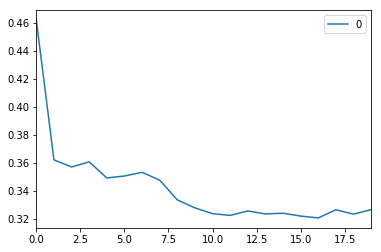

In [102]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
y_pred = knn.predict(X_test)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [106]:
print("{} kNN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 kNN Score: 81.97%


In [107]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

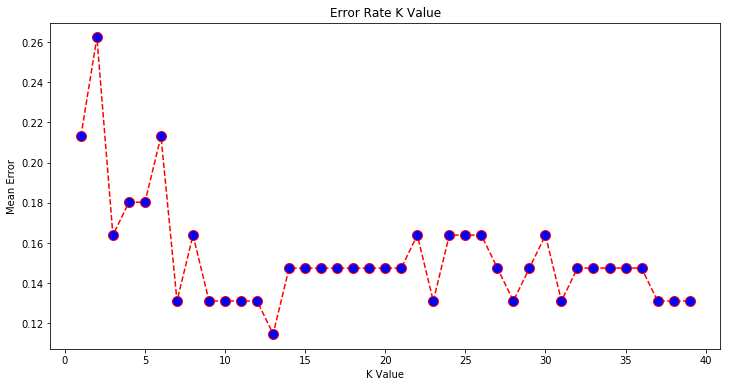

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**LogisticRegression**

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Muthu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85%


In [111]:
train_value = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}%'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.90%


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lg = confusion_matrix(y_test, y_pred)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

   micro avg       0.85      0.85      0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



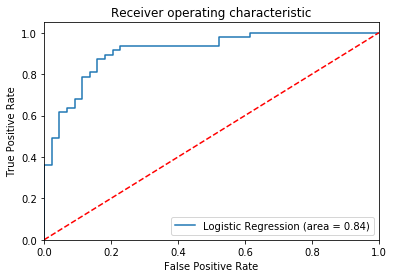

In [114]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [115]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
confusion_matrix_lg = confusion_matrix(y_test, y_pred)

Support Vector Machines (SVM)

In [116]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
y_pred = svclassifier.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

   micro avg       0.85      0.85      0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [119]:
# confusion matrix
confusion_matrix_svm = confusion_matrix(y_test,y_pred)

Decision Tree

In [133]:
accuracies = {}

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 90.11%


In [135]:
confusion_matrix_dt = confusion_matrix(y_test,y_pred)

Clustring and K-Means

In [151]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [152]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [153]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, 0, 1, 3, 1, 0, 3, 3, 0, 1, 0, 3, 1, 0, 1, 3, 0, 0, 0, 0,
       0, 0, 3, 1, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 3, 0,
       1, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 1, 0, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 2, 1, 3,
       3, 0, 0, 3, 0, 1, 3, 3, 2, 0, 1, 0, 0, 1, 3, 0, 3, 3, 0, 0, 0, 0,
       1, 3, 1, 3, 0, 0, 3, 3, 3, 0, 1, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 0,
       1, 0, 1, 0, 3, 3, 3, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 1,
       0, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 1, 0, 0, 0, 3, 0, 0, 1, 0, 3, 3,
       0, 1, 3, 1, 1, 3, 1, 0, 0, 1, 0, 1, 0, 3, 1, 3, 3, 1, 3, 1, 0, 0,
       1, 0, 3, 0, 1, 1, 3, 0, 0, 0, 3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 0, 0,
       2, 3, 1, 1, 0, 3, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 1, 3, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0,
       3, 3, 1, 3, 1, 1, 0, 0, 3, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0, 3, 1,
       3, 0, 1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3,

In [154]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 5.34017094e+01,  7.09401709e-01,  1.03418803e+00,
         1.29470085e+02,  2.42940171e+02,  1.45299145e-01,
         5.04273504e-01,  1.57196581e+02,  2.73504274e-01,
         8.76923077e-01,  1.43589744e+00,  6.75213675e-01,
         2.30769231e+00,  4.95726496e-01,  5.04273504e-01,
         6.93889390e-18,  4.27350427e-01,  1.88034188e-01,
         3.07692308e-01,  7.69230769e-02,  3.46944695e-18,
         5.12820513e-02,  5.89743590e-01,  3.58974359e-01,
         5.98290598e-02,  4.44444444e-01,  4.95726496e-01,
         6.06837607e-01,  1.88034188e-01,  1.45299145e-01,
         4.27350427e-02,  1.70940171e-02],
       [ 5.70000000e+01,  6.30952381e-01,  8.57142857e-01,
         1.37488095e+02,  2.99119048e+02,  1.54761905e-01,
         4.76190476e-01,  1.42880952e+02,  4.40476190e-01,
         1.15000000e+00,  1.38095238e+00,  8.92857143e-01,
         2.40476190e+00,  5.47619048e-01,  4.28571429e-01,
         2.38095238e-02,  5.23809524e-01,  1.66666667e-01,
         2.38

TypeError: '(array([ True,  True, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True]), 0)' is an invalid key

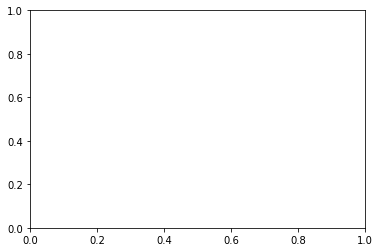

In [156]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

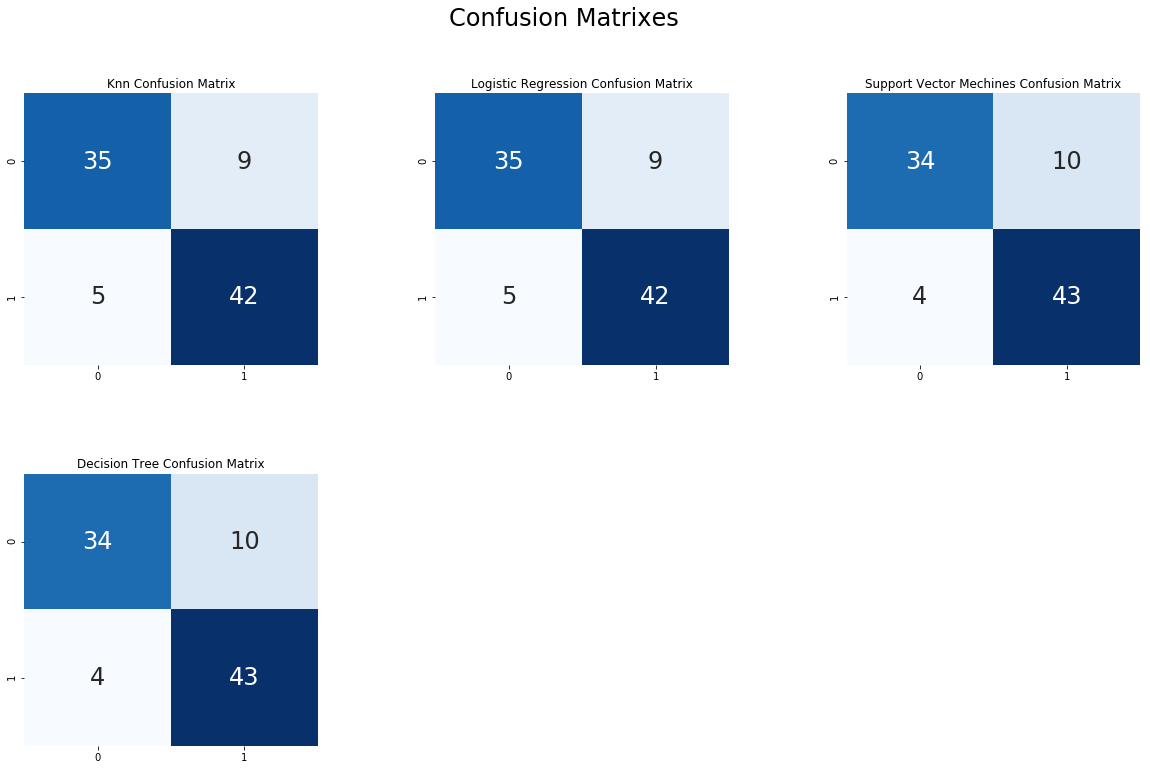

In [146]:
plt.figure(figsize=(20,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Knn Confusion Matrix")
sns.heatmap(confusion_matrix_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix_lg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Mechines Confusion Matrix")
sns.heatmap(confusion_matrix_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
